In [ ]:
#The objective of this activity is to explore feature detection and description. This uses Brute-Force matcher with SIFT
# For better understanding, please read: https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
image1 = cv2.imread("cornpops.PNG")

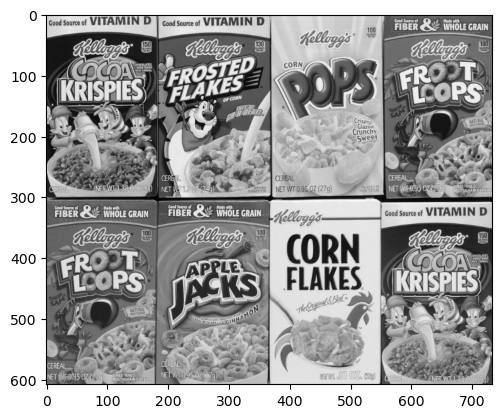

In [5]:
image1_gray = cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
plt.imshow(image1_gray,cmap="gray")

In [6]:
sift = cv2.SIFT_create()
keypoints1 = sift.detect(image1_gray,None)# sift.detect() detects keypoints in an image.Each keypoint is a special structure which has many attributes like its (x,y) coordinates, size of the meaningful neighbourhood, angle which specifies its orientation, response that specifies strength of keypoints etc.

In [7]:
# cv.drawKeyPoints() function which draws the small circles on the locations of keypoints.
image1 = cv2.drawKeypoints(image1_gray,keypoints1,image1)

In [8]:
cv2.imwrite("sift_keypoints.PNG",image1)

True

In [9]:
image1=cv2.drawKeypoints(image1_gray,keypoints1,image1,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) # This will draw a circle with size of keypoint and it will also show its orientation.
cv2.imwrite("sift_keypoints.PNG",image1) # Another cornpops image named "sift_keypoints" will be created. It shows keypoints circled and orientation shown.
 

True

In [10]:
#Now we can calculate the descriptors, OpenCV provides two methods
#1. Since we've already found keypoints, we can call sift.compute() function which computes the descriptors from the keypoints we've found. For instance keypoints,descriptors = sift.compute(gray,keypoints)
#2. If you didn't find keypoints, directly find keypoints and descriptors in a single step with the function, sift.detectAndCompute().
#Let's use the method 2

In [11]:
sift = cv2.SIFT_create()
keypoints1,descriptors1 = sift.detectAndCompute(image1_gray,None)

In [12]:
# keypoints is a list of keypoints 
keypoints1

(< cv2.KeyPoint 000001AC6C699EC0>,
 < cv2.KeyPoint 000001AC6E641B90>,
 < cv2.KeyPoint 000001AC6E641C50>,
 < cv2.KeyPoint 000001AC6E641AA0>,
 < cv2.KeyPoint 000001AC6E641E90>,
 < cv2.KeyPoint 000001AC6E641D10>,
 < cv2.KeyPoint 000001AC6E641D40>,
 < cv2.KeyPoint 000001AC6E641CB0>,
 < cv2.KeyPoint 000001AC6E641CE0>,
 < cv2.KeyPoint 000001AC6E641D70>,
 < cv2.KeyPoint 000001AC6E641E60>,
 < cv2.KeyPoint 000001AC6E641C80>,
 < cv2.KeyPoint 000001AC6E641EF0>,
 < cv2.KeyPoint 000001AC6E641F50>,
 < cv2.KeyPoint 000001AC6E641FE0>,
 < cv2.KeyPoint 000001AC6E642010>,
 < cv2.KeyPoint 000001AC6E642070>,
 < cv2.KeyPoint 000001AC6E642040>,
 < cv2.KeyPoint 000001AC6E641BC0>,
 < cv2.KeyPoint 000001AC6E641F80>,
 < cv2.KeyPoint 000001AC6E641A70>,
 < cv2.KeyPoint 000001AC6E641BF0>,
 < cv2.KeyPoint 000001AC6E641C20>,
 < cv2.KeyPoint 000001AC6E641DA0>,
 < cv2.KeyPoint 000001AC6E641DD0>,
 < cv2.KeyPoint 000001AC6E641E00>,
 < cv2.KeyPoint 000001AC6E641E30>,
 < cv2.KeyPoint 000001AC6E641B60>,
 < cv2.KeyPoint 0000

In [14]:
#The number of keypoints found IS 5300 
len(keypoints1)

5300

In [15]:
#descriptors are shown as a numpy array of shape (Number of Keypoints)×128.
descriptors1

array([[ 0.,  0.,  0., ...,  8.,  5.,  3.],
       [57., 44., 54., ...,  4.,  0.,  0.],
       [33.,  0.,  0., ...,  0.,  1.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  2.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1., 31., 37.],
       [ 0.,  1.,  6., ...,  0.,  6., 36.]], dtype=float32)

In [16]:
#The shape of array of computed number of feature descriptors is 5300 x 128

In [17]:
# What is next!
#Since we have got the keypoints and extracted feature descriptors, we can use them for matching keypoints in different images
#Common three methods are:
#1. Brute-Force matching with ORB descriptors
#2. Brute-Force matching with SIFT descriptors and ratio test
#3.FLANN Based Matcher

In [18]:
# Brute-Force matcher is simple. It takes the descriptor of one feature in first set and is matched with all other features in second set using some distance calculation. And the closest one is returned.
# For better understanding of brute force matcher, read: https://docs.opencv.org/3.4/dc/dc3/tutorial_py_matcher.html
# Let's use Brute-Force Matching with SIFT Descriptors and Ratio Test

In [19]:
# Let's load a second image named cornpop
img2 = cv2.imread("cornpop.PNG",cv2.IMREAD_GRAYSCALE)

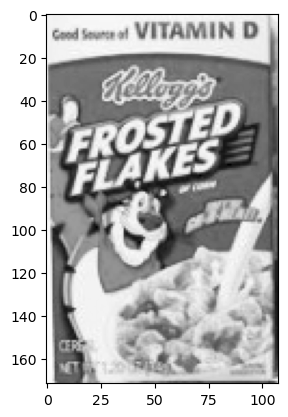

In [20]:
plt.imshow(img2,cmap="gray")

Brute-Force matching with SIFT descriptors and ratio test


In [21]:
#Initiate SIFT detector
sift = cv2.SIFT_create()

In [22]:
#Let's find the keypoints and descriptors with SIFT for image 2
keypoints2,descriptors2 = sift.detectAndCompute(img2,None)

In [23]:
#Observe keypoints2
keypoints2

(< cv2.KeyPoint 000001AC6A167C60>,
 < cv2.KeyPoint 000001AC6C661380>,
 < cv2.KeyPoint 000001AC6C699F80>,
 < cv2.KeyPoint 000001AC6C699E90>,
 < cv2.KeyPoint 000001AC6C69A580>,
 < cv2.KeyPoint 000001AC6C930C00>,
 < cv2.KeyPoint 000001AC6C9309C0>,
 < cv2.KeyPoint 000001AC6A142310>,
 < cv2.KeyPoint 000001AC6A143D50>,
 < cv2.KeyPoint 000001AC6A1423D0>,
 < cv2.KeyPoint 000001AC6C655DD0>,
 < cv2.KeyPoint 000001AC6E6BD680>,
 < cv2.KeyPoint 000001AC6E6BD770>,
 < cv2.KeyPoint 000001AC6E6BF6F0>,
 < cv2.KeyPoint 000001AC6E6BFB70>,
 < cv2.KeyPoint 000001AC6E6BC390>,
 < cv2.KeyPoint 000001AC6E6BD800>,
 < cv2.KeyPoint 000001AC6E6BC240>,
 < cv2.KeyPoint 000001AC6E6BD050>,
 < cv2.KeyPoint 000001AC6E6BF600>,
 < cv2.KeyPoint 000001AC6E6BFBA0>,
 < cv2.KeyPoint 000001AC6E6BDA70>,
 < cv2.KeyPoint 000001AC6E6BE220>,
 < cv2.KeyPoint 000001AC6E6BE2B0>,
 < cv2.KeyPoint 000001AC6E6BF810>,
 < cv2.KeyPoint 000001AC6E6BDB00>,
 < cv2.KeyPoint 000001AC6E6BFC30>,
 < cv2.KeyPoint 000001AC6E6BFC60>,
 < cv2.KeyPoint 0000

In [25]:
#The number of keypoints found IS 365 
len(keypoints2)

365

In [26]:
# Create a BFMatcher with default parameters
bruteforce = cv2.BFMatcher()
matches = bruteforce.knnMatch(descriptors1,descriptors2,k=2)

In [27]:
#Apply the ratio test
goodmatches = []
for m,n in matches:
    if m.distance <0.75*n.distance:
        goodmatches.append([m])

In [29]:
image3 = cv2.drawMatchesKnn(image1,keypoints1,img2,keypoints2,goodmatches,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

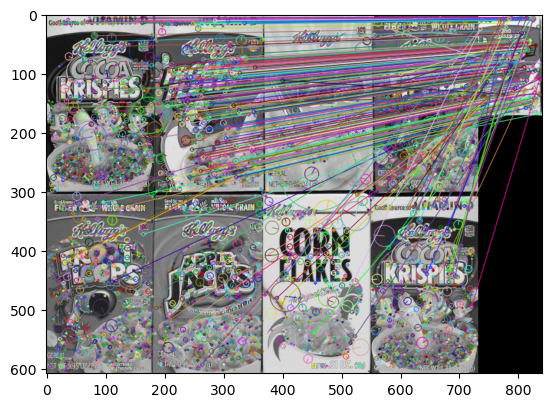

(<matplotlib.image.AxesImage at 0x1ac6e6edfc0>, None)

In [30]:
plt.imshow(image3),plt.show()

Brute-Force matching with ORB descriptors: For this method, open another activity
